In [1]:
import autoreload

In [2]:
import random
import numpy as np
from data_process import get_CIFAR10_data, get_MUSHROOM_data
from scipy.spatial import distance
from models import Perceptron, SVM, Softmax, Logistic
from kaggle_submission import output_submission_csv

from sklearn.linear_model import LinearRegression 
import matplotlib.pyplot as plt
%matplotlib inline

# For auto-reloading external modules
# See http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload module is not an IPython extension.


UsageError: Line magic function `%autoreload` not found.


# Loading Mushroom

In the following cells we determine the splitting of the mushroom dataset.
<br /> TRAINING + VALIDATION = 0.8, TESTING = 0.2

In [4]:
# TRAINING = 0.6 indicates 60% of the data is used as the training dataset.
VALIDATION = 0.2

In [5]:
data = get_MUSHROOM_data(VALIDATION)
X_train_MR, y_train_MR = data['X_train'], data['y_train']
X_val_MR, y_val_MR = data['X_val'], data['y_val']
X_test_MR, y_test_MR = data['X_test'], data['y_test']
n_class_MR = len(np.unique(y_test_MR))

print("Number of train samples: ", X_train_MR.shape[0])
print("Number of val samples: ", X_val_MR.shape[0])
print("Number of test samples: ", X_test_MR.shape[0])

Number of train samples:  4874
Number of val samples:  1625
Number of test samples:  1625


### Get Accuracy

This function computes how well your model performs using accuracy as a metric.

In [6]:
def get_acc(pred, y_test):
    return np.sum(y_test == pred) / len(y_test) * 100

# Logistic Classifier

The Logistic Classifier has 2 hyperparameters that you can experiment with:
- **Learning rate** - controls how much we change the current weights of the classifier during each update. We set it at a default value of 0.5, but you should experiment with different values. We recommend changing the learning rate by factors of 10 and observing how the performance of the classifier changes. You should also try adding a **decay** which slowly reduces the learning rate over each epoch.
- **Number of Epochs** - An epoch is a complete iterative pass over all of the data in the dataset. During an epoch we predict a label using the classifier and then update the weights of the classifier according to the logistic regression update rule for each sample in the training set. You should try different values for the number of training epochs and report your results.

You will implement the Logistic Classifier in the **models/logistic.py**

The following code: 
- Creates an instance of the Logistic classifier class 
- The train function of the Logistic class is trained on the training data
- We use the predict function to find the training accuracy as well as the testing accuracy

### Training Logistic Classifer

In [12]:
learning_rate = 0.05
n_epochs = 5000
epo = []
train_acc = []
valid_acc = []
test_acc = []
lrate = []
for i in np.arange(0.06, 0.10, 0.005):
    lrate.append(i)
    lr = Logistic(i, n_epochs)
    lr.train(X_train_MR, y_train_MR)
    
    pred_lr = lr.predict(X_train_MR)
    accuracy1 = get_acc(y_train_MR, pred_lr)
    train_acc.append(accuracy1)
    
    pred_lr = lr.predict(X_val_MR)
    accuracy2 = get_acc(pred_lr, y_val_MR)
    valid_acc.append(accuracy2)
    
    pred_lr = lr.predict(X_test_MR)
    accuracy3 = get_acc(pred_lr, y_test_MR)
    test_acc.append(accuracy3)
    print(i)

0.06
0.065
0.07
0.07500000000000001
0.08000000000000002
0.08500000000000002
0.09000000000000002
0.09500000000000003
0.10000000000000003


The training accuracy is given by: 94.562987


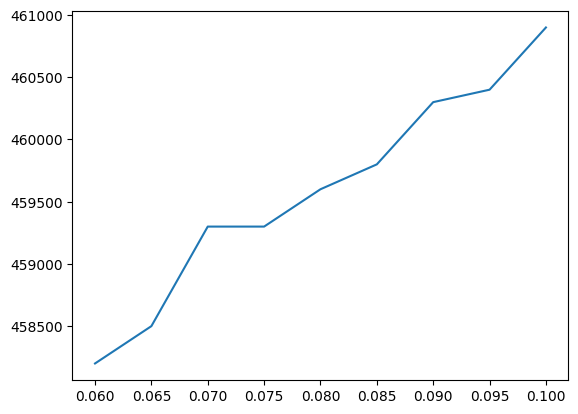

In [13]:
pred_lr = lr.predict(X_train_MR)
print('The training accuracy is given by: %f' % (get_acc(pred_lr, y_train_MR)))
plt.plot(lrate, train_acc) 
plt.show()

### Validate Logistic Classifer

The validation accuracy is given by: 94.215385


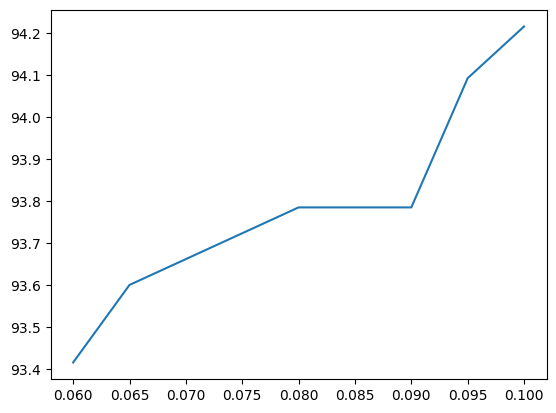

In [9]:
pred_lr = lr.predict(X_val_MR)
print('The validation accuracy is given by: %f' % (get_acc(pred_lr, y_val_MR)))
plt.plot(lrate, valid_acc)
plt.show()

### Test Logistic Classifier

The testing accuracy is given by: 94.153846


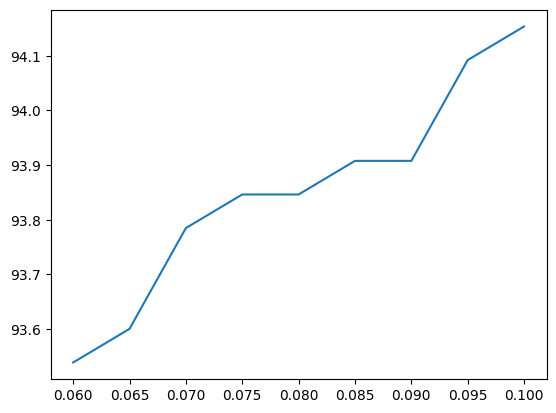

In [10]:
pred_lr = lr.predict(X_test_MR)
print('The testing accuracy is given by: %f' % (get_acc(pred_lr, y_test_MR)))
plt.plot(lrate, test_acc)
plt.show()